# Downside Risk and Sortino Ratio

## Getting Ready

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns.head(50)

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.000000,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.000000,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.000000,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.000000,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.000000,0.005446,0
2010-01-07,0.005733,-0.005733,-0.013236,0.000000,0.005733,0
2010-01-08,-0.000087,0.000087,0.000201,0.000000,0.000000,0
2010-01-09,0.003004,-0.003004,-0.006922,0.000000,0.003004,0
2010-01-10,0.002796,-0.002796,-0.006443,0.002796,-0.000000,0


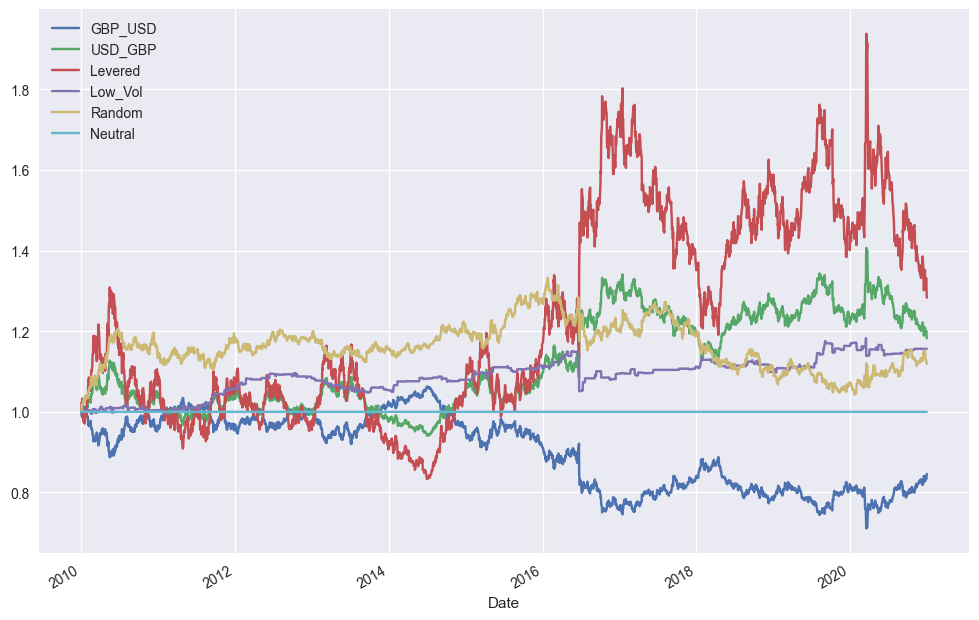

In [3]:
returns.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [4]:
td_year = (returns.count() / ((returns.index[-1] - returns.index[0]).days / 365.25)).iloc[0]
td_year

285.5590909090909

## Downside Deviation (Semi-Deviation)

In [5]:
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


In [6]:
symbol = "USD_GBP"

In [7]:
TMR = 0 # target minimum return

In [8]:
excess_returns = returns[symbol] - TMR # excess returns over TMR
excess_returns

Date
2010-01-02    0.002733
2010-01-03    0.001727
2010-01-04    0.005786
2010-01-05   -0.001687
2010-01-06    0.005446
                ...   
2020-12-23   -0.005004
2020-12-27    0.008278
2020-12-28   -0.003799
2020-12-29   -0.009054
2020-12-30   -0.003012
Name: USD_GBP, Length: 3139, dtype: float64

In [9]:
excess_returns = np.where(excess_returns < 0, excess_returns, 0) # setting postive excess returns to zero. 
excess_returns

array([ 0.        ,  0.        ,  0.        , ..., -0.00379932,
       -0.00905404, -0.00301208])

In [10]:
downside_deviation = np.sqrt(np.mean(excess_returns**2)) 
downside_deviation

0.0036313265134239915

## Sortino Ratio

In [11]:
downside_deviation

0.0036313265134239915

In [12]:
mean = returns[symbol].mean() 
mean

5.333811413562378e-05

In [13]:
sortino = (mean - TMR) / downside_deviation * np.sqrt(td_year)
sortino

0.24821061528136432

## Putting everything toghether

In [14]:
import pandas as pd
import numpy as np

In [15]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


In [16]:
def sortino(series, TMR = 0):
    excess_returns = (series - TMR)
    downside_deviation = np.sqrt(np.mean(np.where(excess_returns < 0, excess_returns, 0)**2))
    if downside_deviation == 0:
        return np.nan
    else:
        sortino = (series.mean() - TMR) / downside_deviation * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))
        return sortino

In [17]:
returns.apply(sortino).sort_values(ascending = False)

Low_Vol    0.396547
USD_GBP    0.248211
Random     0.182185
Levered    0.159784
GBP_USD   -0.225971
Neutral         NaN
dtype: float64

In [18]:
sortino(series = returns.USD_GBP, TMR = 0)

0.24821061528136432

-------------------------------------

## Coding Challenge

__Calculate and compare__ the __Sortino Ratio__ (assumption: TMR == 0) for __30 large US stocks__ that currently form the Dow Jones Industrial Average Index ("Dow Jones") for the time period between April 2019 and June 2021. 

__Hint:__ You can __import__ the price data from __"Dow_Jones.csv"__.
 

Determine the __best performing stock__ and the __worst performing stock__ according to the Sortino Ratio.

__Compare__ Sortino Ratio and Sharpe Ratio. Does the __ranking change__?

(Remark: Dividends are ignored here. Hence, for simplicity reasons, the Sortino Ratio is based on Price Returns only. As a consequence, dividend-paying stocks are getting penalized.) 

## +++ Please stop here in case you don´t want to see the solution!!! +++++

## Coding Challenge Solution

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Dow_Jones.csv", index_col = "Date", parse_dates = ["Date"])
df

In [ ]:
returns = np.log(df / df.shift()) # daily log returns
returns

In [ ]:
def sortino(series, TMR = 0):
    excess_returns = (series - TMR)
    downside_deviation = np.sqrt(np.mean(np.where(excess_returns < 0, excess_returns, 0)**2))
    if downside_deviation == 0:
        return np.nan
    else:
        sortino = (series.mean() - TMR) / downside_deviation * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))
        return sortino

In [ ]:
sort = returns.apply(sortino).sort_values(ascending = False)
sort

Best Performing Stock: __Apple__ (AAPL) <br>
Worst Performing Stock: __Non-determinable__ (note: you can´t compare negative Sortino Ratios)

In [ ]:
def sharpe(series, rf = 0):
    
    if series.std() == 0:
        return np.nan
    else:
        return (series.mean() - rf) / series.std() * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))

In [ ]:
sha = returns.apply(sharpe).sort_values(ascending = False)
sha

In [ ]:
merged = pd.concat([sort, sha], axis = 1)
merged

In [ ]:
merged.columns = ["Sortino", "Sharpe"]

In [ ]:
merged.rank(ascending = False)

-> Few Differences. __Disney gets better ranked__ with Sortino (-3) while __The Home Depot gets penalized__ by Sortino (+3).